# Create Needle In A Haystack Visualization

Let's run through how to create the visualization for the Needle In A Hackstack Test.

At a highlevel, it's a two step process
1. Generate a pivot table based on the results
2. Use that pivot table as the basis for Google Slides (or whatever design tool ou want) custom formatting.

See the final [visualization](https://docs.google.com/presentation/d/15JEdEBjm32qBbqeYM6DK6G-3mUJd7FAJu-qEzj8IYLQ/edit?usp=sharing).
See the [overview video](https://twitter.com/GregKamradt/status/1729573848893579488) for this code.

Let's get started. 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import json
import os
import glob

The assumption is that your individual test results will be saved to separate files. This is done to make concurrent requests easier.

If that isn't the case, feel free to change up the loading process below. The end result we want is a table with three columns (one row per test)
1. Context Length
2. Document Depth
3. Score Result

Change the folder location for where your results are stored. I'll use the original results folder for this test

## Load Data

In [9]:
# Path to the directory containing JSON results
folder_path = '../results/meta-llama/'  # Replace with your folder path

# Using glob to find all json files in the directory
json_files = glob.glob(f"{folder_path}/*.json")

# List to hold the data
data = []

# Iterating through each file and extract the 3 columns we need
for file in json_files:
    with open(file, 'r') as f:
        json_data = json.load(f)
        # Extracting the required fields
        document_depth = json_data.get("depth_percent", None)
        context_length = json_data.get("context_length", None)
        score = json_data.get("score", None)
        # Appending to the list
        data.append({
            "Document Depth": document_depth,
            "Context Length": context_length,
            "Score": score
        })

# Creating a DataFrame
df = pd.DataFrame(data)

print (df.head())
print (f"You have {len(df)} rows")

   Document Depth  Context Length  Score
0             0.0            2000     10
1            25.0            2000     10
2            50.0            2000     10
3            75.0            2000     10
4           100.0            2000     10
You have 50 rows


Then let's create a pivot table. If you just ran the test once, then this step isn't needed (but it can be done anyway). If you ran the rest multiple times then this will average out your scores.

## Pivot Data

In [10]:
pivot_table = pd.pivot_table(df, values='Score', index=['Document Depth', 'Context Length'], aggfunc='mean').reset_index() # This will aggregate
pivot_table = pivot_table.pivot(index="Document Depth", columns="Context Length", values="Score") # This will turn into a proper pivot
pivot_table.iloc[:5, :5]

Context Length,2000,6000,10000,15000,21000
Document Depth,,,,,
0.0,10.0,10.0,10.0,10.0,10.0
25.0,10.0,10.0,10.0,10.0,10.0
50.0,10.0,10.0,10.0,10.0,10.0
75.0,10.0,10.0,10.0,10.0,10.0
100.0,10.0,10.0,10.0,10.0,10.0


## Make Visualization

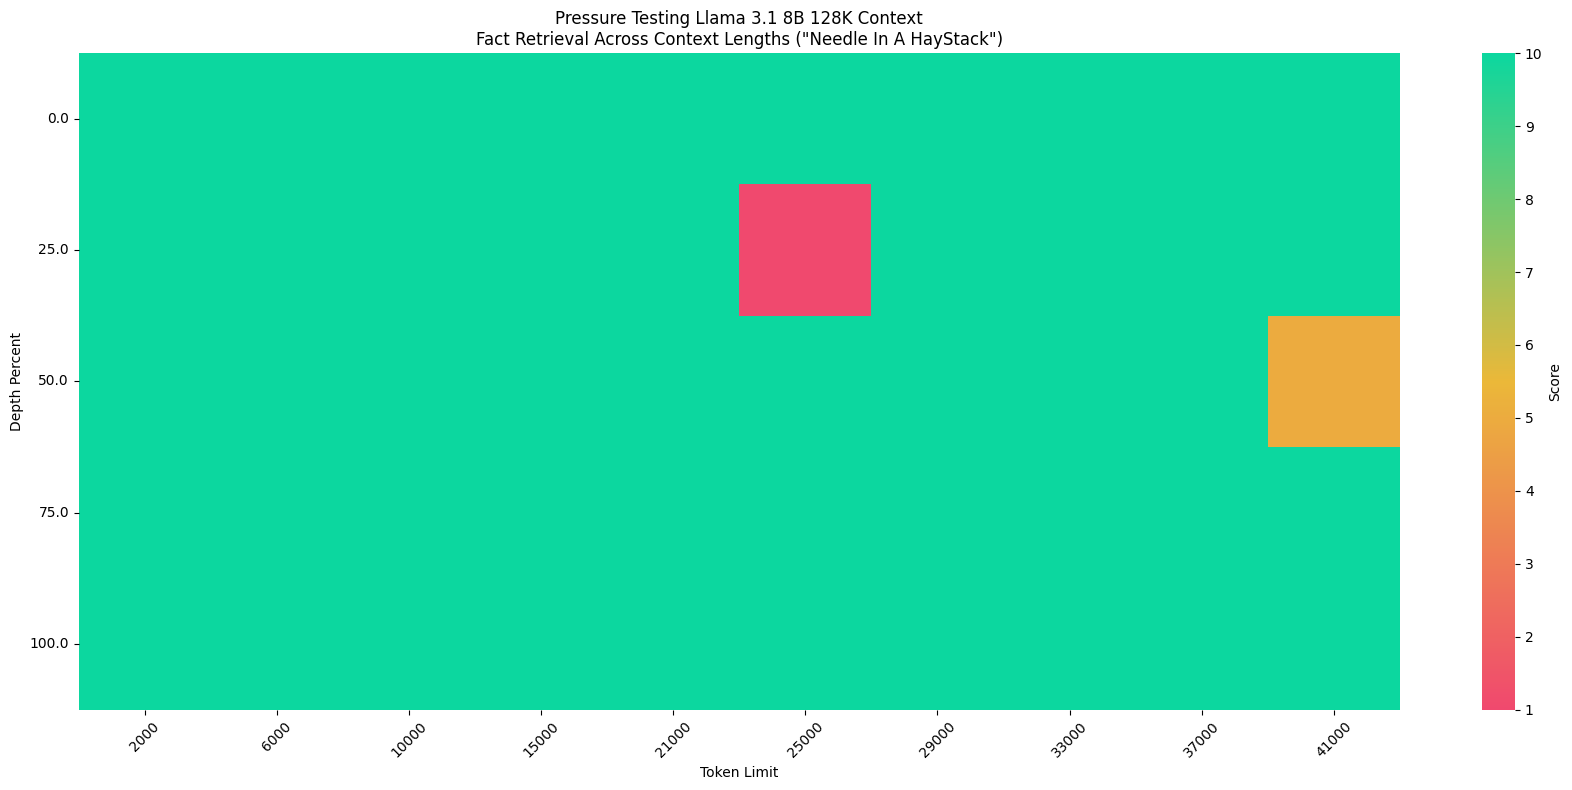

In [11]:
# Create a custom colormap. Go to https://coolors.co/ and pick cool colors
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])

# Create the heatmap with better aesthetics
plt.figure(figsize=(17.5, 8))  # Can adjust these dimensions as needed
sns.heatmap(
    pivot_table,
    # annot=True,
    fmt="g",
    cmap=cmap,
    cbar_kws={'label': 'Score'}
)

# More aesthetics
plt.title('Pressure Testing Llama 3.1 8B 128K Context\nFact Retrieval Across Context Lengths ("Needle In A HayStack")')  # Adds a title
plt.xlabel('Token Limit')  # X-axis label
plt.ylabel('Depth Percent')  # Y-axis label
plt.xticks(rotation=45)  # Rotates the x-axis labels to prevent overlap
plt.yticks(rotation=0)  # Ensures the y-axis labels are horizontal
plt.tight_layout()  # Fits everything neatly into the figure area

# Show the plot
plt.show()

Found 100 result files matching the pattern: ../needle_results_20250730_013313/results_c*_d*_r*.txt

Successfully extracted data from 100 files
   Context Length  Document Depth  Run  Score  Generation Time (s)
0            2000               0    1     10                  0.5
1            2000               0    2     10                  0.5
2            2000              25    1     10                  0.5
3            2000              25    2     10                  0.7
4            2000              50    1     10                  0.7

Generation Time Comparison (Run 2 vs Run 1):
Run  Context Length  Document Depth    1    2  Time Difference (s)  \
0              2000               0  0.5  0.5                  0.0   
1              2000              25  0.5  0.7                  0.2   
2              2000              50  0.7  0.7                  0.0   
3              2000              75  0.7  0.7                  0.0   
4              2000             100  0.7  0.7             

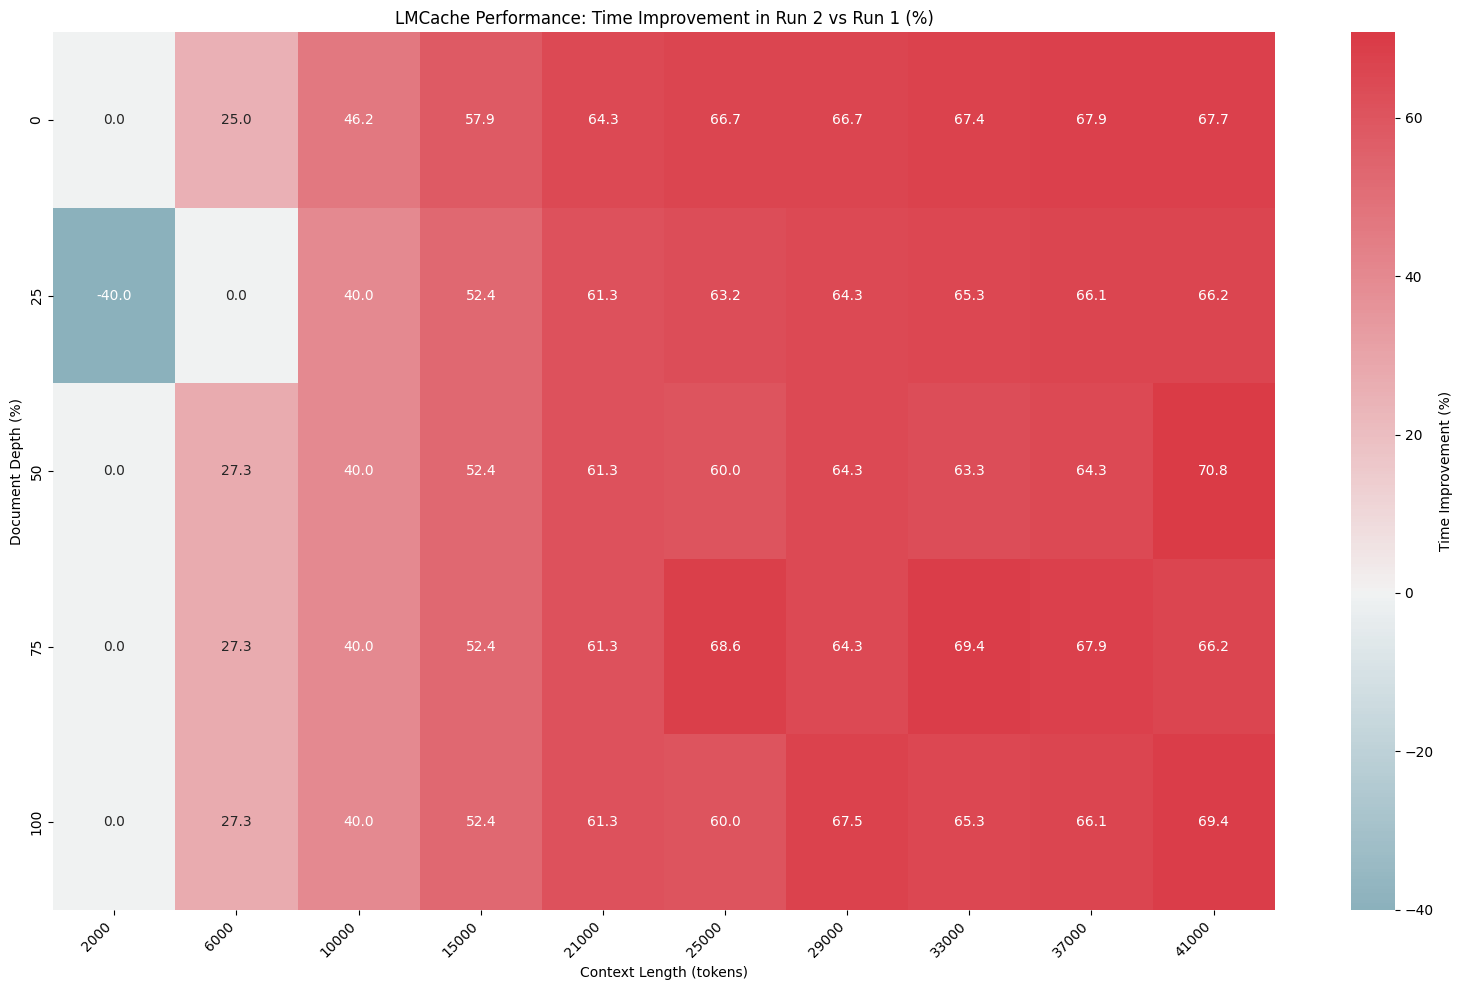

<Figure size 1600x800 with 0 Axes>

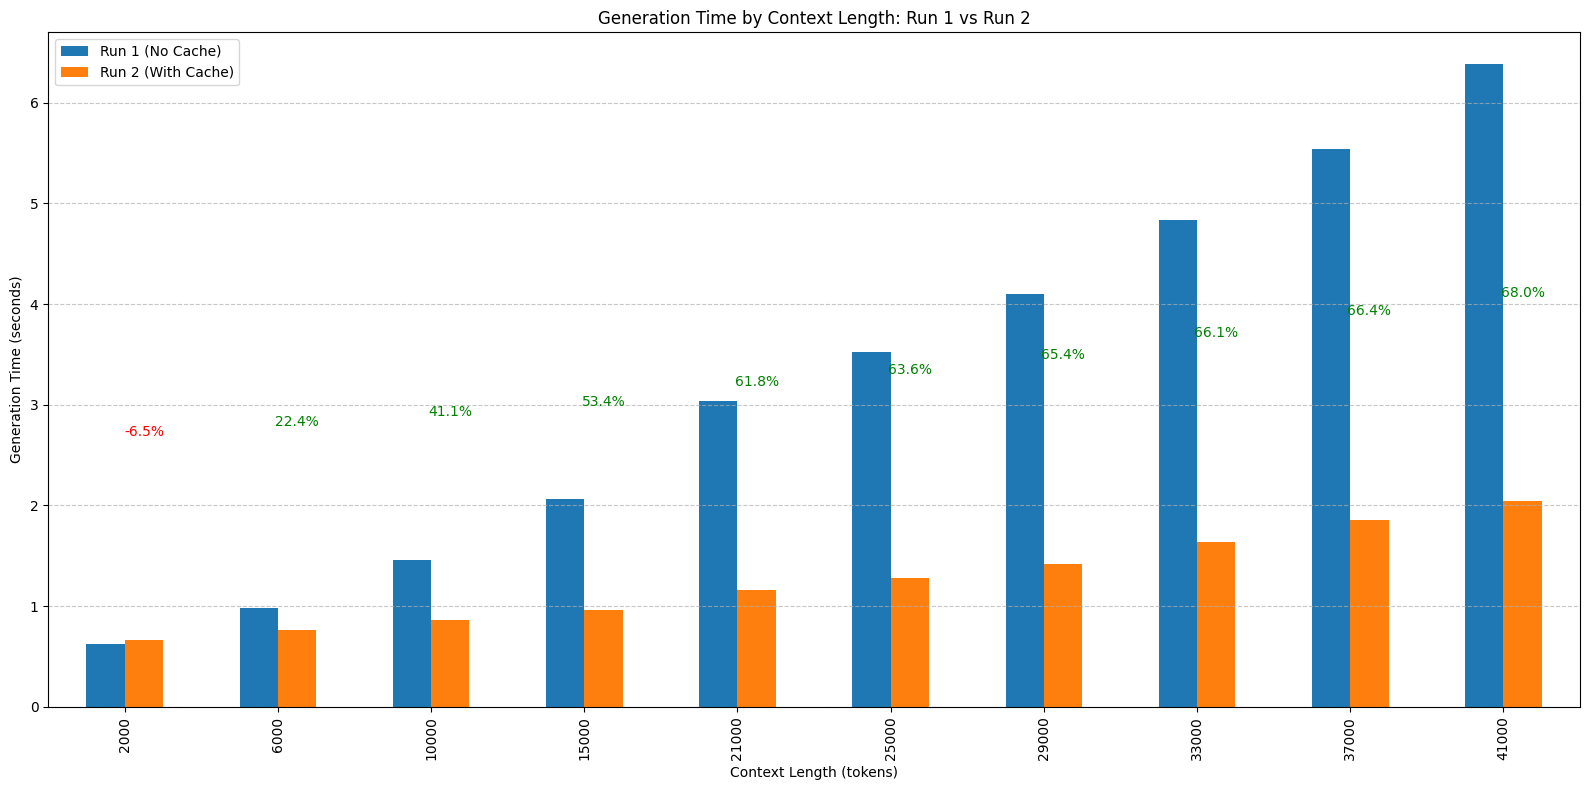

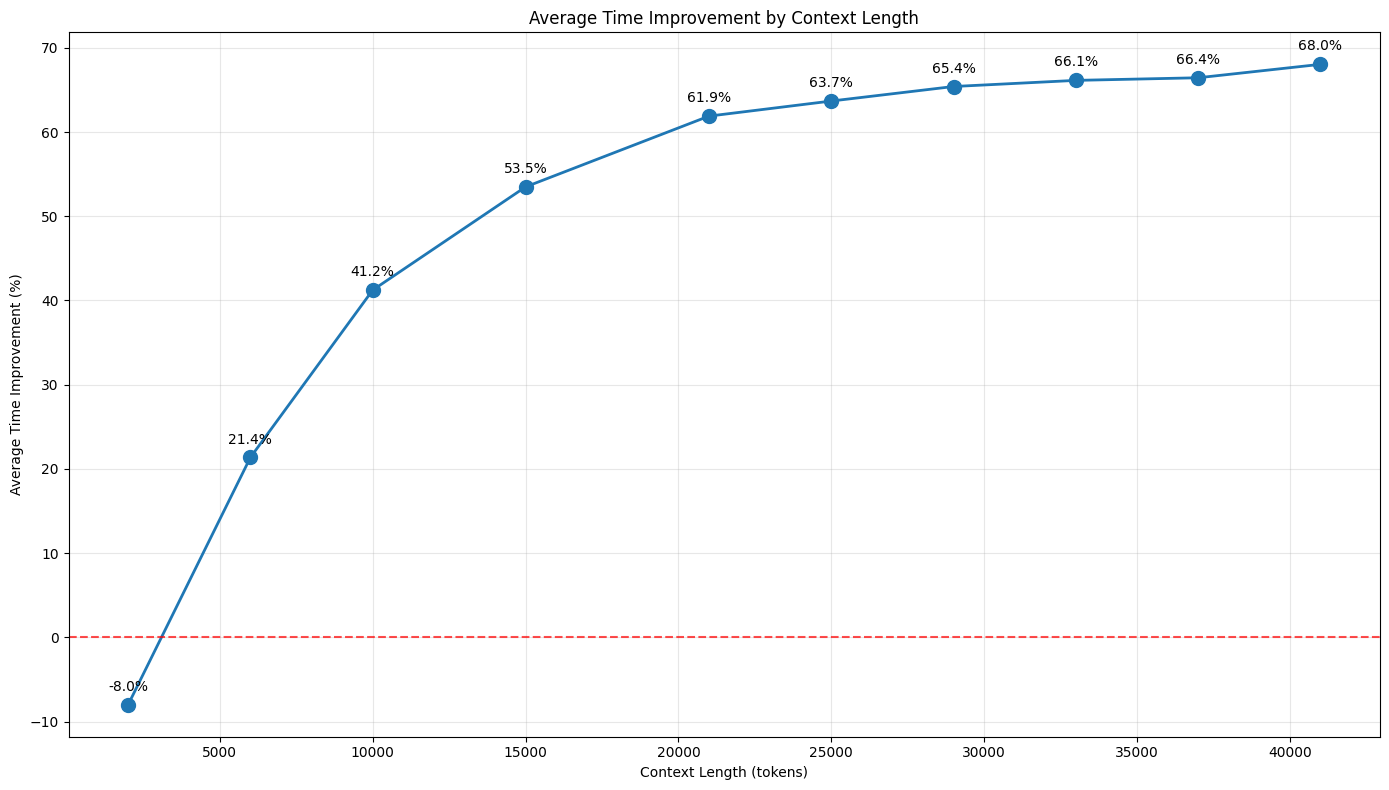


Score Comparison (Run 2 vs Run 1):
Run  Context Length  Document Depth     1     2  Score Difference
0              2000               0  10.0  10.0               0.0
1              2000              25  10.0  10.0               0.0
2              2000              50  10.0  10.0               0.0
3              2000              75  10.0  10.0               0.0
4              2000             100  10.0  10.0               0.0
5              6000               0  10.0  10.0               0.0
6              6000              25  10.0  10.0               0.0
7              6000              50  10.0  10.0               0.0
8              6000              75  10.0  10.0               0.0
9              6000             100  10.0  10.0               0.0
10            10000               0  10.0  10.0               0.0
11            10000              25  10.0  10.0               0.0
12            10000              50  10.0  10.0               0.0
13            10000              75  10.

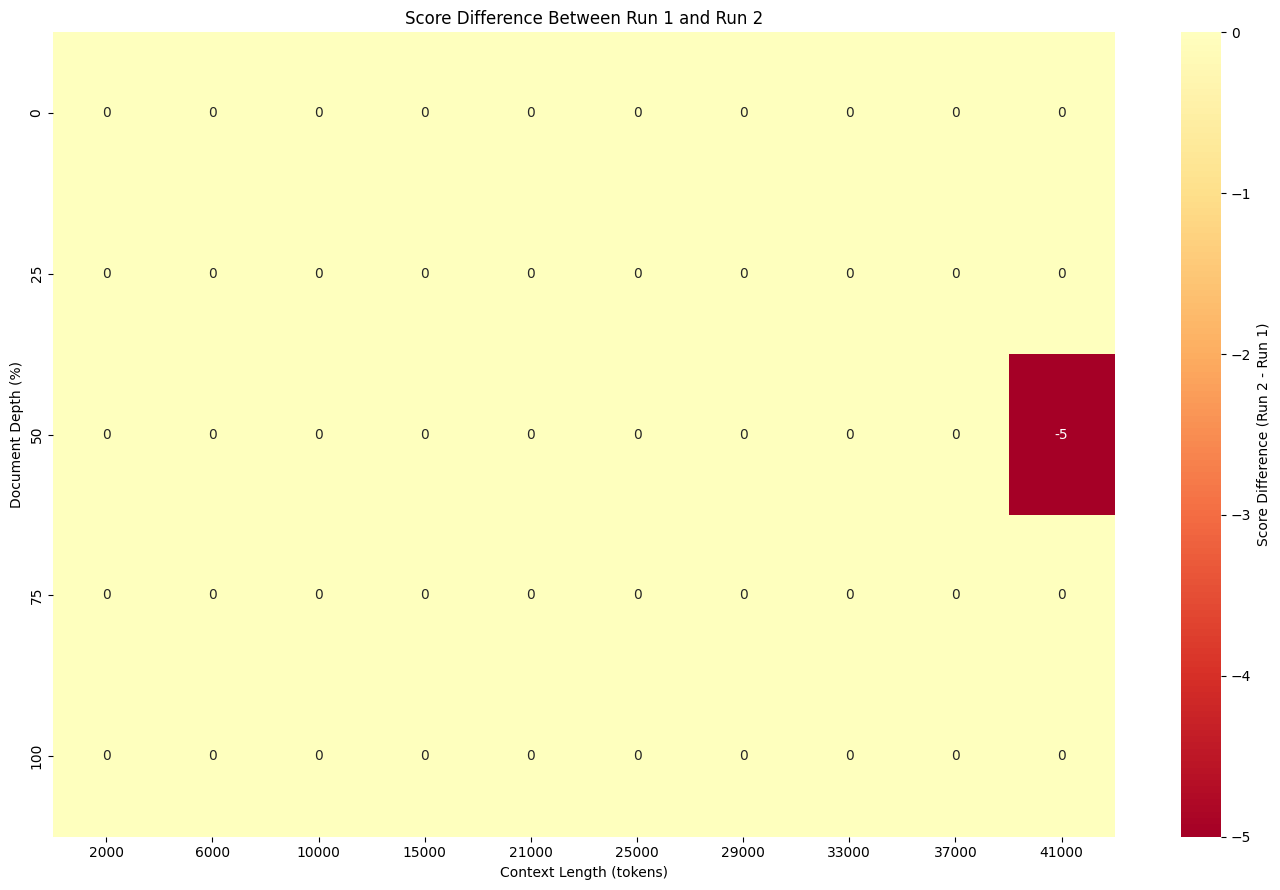

In [ ]:
# New cell for comparing generation times between runs based on text files

import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

# Path to the directory containing text results (change to your specific folder)
results_folder = '../needle_results_20250730_013313'  # Update this to your folder name

# Pattern to find files
file_pattern = f"{results_folder}/results_c*_d*_r*.txt"

# Find all result text files
result_files = glob.glob(file_pattern)
print(f"Found {len(result_files)} result files matching the pattern: {file_pattern}")

# List to hold the time comparison data
time_data = []

# Regular expressions for extracting data - more robust patterns
context_pattern = re.compile(r'Context:\s*(\d+)\s*tokens')
depth_pattern = re.compile(r'Depth:\s*(\d+)%')
score_pattern = re.compile(r'Score:\s*(\d+)')
duration_pattern = re.compile(r'Duration:\s*([0-9.]+)\s*seconds')

# Extracting run number, context, and depth directly from filename
run_pattern = re.compile(r'results_c(\d+)_d(\d+)_r(\d+)\.txt')

# Process each file
for file_path in result_files:
    # Extract run number, context, and depth from filename
    run_match = run_pattern.search(file_path)
    if not run_match:
        print(f"Skipping file (no match): {file_path}")
        continue
    
    context_length = int(run_match.group(1))
    depth_percent = int(run_match.group(2))
    run_number = int(run_match.group(3))
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            
            # Extract metrics from the file content
            score_match = score_pattern.search(content)
            duration_match = duration_pattern.search(content)
            
            # Only proceed if we found both score and duration
            if score_match and duration_match:
                score = int(score_match.group(1))
                duration = float(duration_match.group(1))
                
                # Add to data list
                time_data.append({
                    'Context Length': context_length,
                    'Document Depth': depth_percent,
                    'Run': run_number,
                    'Score': score,
                    'Generation Time (s)': duration
                })
            else:
                print(f"Couldn't extract score or duration from: {file_path}")
    except Exception as e:
        print(f"Error processing file {file_path}: {str(e)}")

# Creating a DataFrame for time analysis
time_df = pd.DataFrame(time_data)

# Check if the DataFrame is empty
if time_df.empty:
    print("No data was extracted from the files.")
else:
    print(f"\nSuccessfully extracted data from {len(time_df)} files")
    print(time_df.head())
    
    # Calculate time differences between runs
    # First create a pivot table by run number
    time_pivot = time_df.pivot_table(
        values='Generation Time (s)',
        index=['Context Length', 'Document Depth'],
        columns='Run',
        aggfunc='mean'
    ).reset_index()
    
    # Only calculate improvements if we have both run 1 and 2
    if 1 in time_pivot.columns and 2 in time_pivot.columns:
        time_pivot['Time Difference (s)'] = time_pivot[2] - time_pivot[1]
        time_pivot['Time Improvement (%)'] = (1 - (time_pivot[2] / time_pivot[1])) * 100
        
        print("\nGeneration Time Comparison (Run 2 vs Run 1):")
        display_cols = ['Context Length', 'Document Depth', 1, 2, 'Time Difference (s)', 'Time Improvement (%)']
        print(time_pivot[display_cols].sort_values(by=['Context Length', 'Document Depth']))
        
        # Create a heatmap of time improvements
        plt.figure(figsize=(16, 10))
        time_heatmap = time_pivot.pivot(
            index='Document Depth', 
            columns='Context Length', 
            values='Time Improvement (%)'
        )
        
        # Create a diverging colormap (blue for improvement, red for regression)
        div_cmap = sns.diverging_palette(220, 10, as_cmap=True)
        
        # Plot the heatmap
        ax = sns.heatmap(
            time_heatmap,
            cmap=div_cmap,
            center=0,  # Center the colormap at 0
            annot=True,
            fmt=".1f",
            cbar_kws={'label': 'Time Improvement (%)'}
        )
        
        # Ensure all axis labels are visible
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        plt.title('LMCache Performance: Time Improvement in Run 2 vs Run 1 (%)')
        plt.xlabel('Context Length (tokens)')
        plt.ylabel('Document Depth (%)')
        plt.tight_layout()
        plt.show()
        
        # Create bar chart comparing runs by context length
        plt.figure(figsize=(16, 8))
        
        # Group by context length and average across depths
        by_context = time_df.groupby(['Context Length', 'Run'])['Generation Time (s)'].mean().reset_index()
        by_context_pivot = by_context.pivot(index='Context Length', columns='Run', values='Generation Time (s)')
        
        # Plot the bar chart
        ax = by_context_pivot.plot(kind='bar', figsize=(16, 8))
        
        # Add percentage improvement labels
        for i, container in enumerate(ax.containers):
            if i == 1:  # Only for Run 2 bars
                for j, val in enumerate(container):
                    run1_time = by_context_pivot[1].iloc[j]
                    run2_time = by_context_pivot[2].iloc[j]
                    if not pd.isna(run1_time) and not pd.isna(run2_time) and run1_time > 0:
                        improvement = (1 - (run2_time / run1_time)) * 100
                        ax.text(val.get_x() + val.get_width()/1.5, 
                               val.get_height() + 1,  # Adjust this value if labels overlap bars
                               f'{improvement:.1f}%',
                               ha='center', va='bottom', rotation=0,
                               color='green' if improvement > 0 else 'red')
        
        plt.title('Generation Time by Context Length: Run 1 vs Run 2')
        plt.xlabel('Context Length (tokens)')
        plt.ylabel('Generation Time (seconds)')
        plt.legend(['Run 1 (No Cache)', 'Run 2 (With Cache)'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # Create a line plot showing improvement trend by context length
        plt.figure(figsize=(14, 8))
        
        # Calculate average improvement by context length
        improvement_by_context = time_pivot.groupby('Context Length')['Time Improvement (%)'].mean().reset_index()
        
        plt.plot(improvement_by_context['Context Length'], 
                 improvement_by_context['Time Improvement (%)'], 
                 'o-', linewidth=2, markersize=10)
        
        plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
        plt.grid(True, alpha=0.3)
        plt.title('Average Time Improvement by Context Length')
        plt.xlabel('Context Length (tokens)')
        plt.ylabel('Average Time Improvement (%)')
        
        # Add value labels to points
        for x, y in zip(improvement_by_context['Context Length'], improvement_by_context['Time Improvement (%)']):
            plt.annotate(f'{y:.1f}%', 
                        (x, y),
                        textcoords="offset points", 
                        xytext=(0,10), 
                        ha='center')
        
        plt.tight_layout()
        plt.show()
        
        # Also compare scores between runs
        score_pivot = time_df.pivot_table(
            values='Score', 
            index=['Context Length', 'Document Depth'], 
            columns='Run', 
            aggfunc='mean'
        ).reset_index()
        
        if 1 in score_pivot.columns and 2 in score_pivot.columns:
            score_pivot['Score Difference'] = score_pivot[2] - score_pivot[1]
            
            print("\nScore Comparison (Run 2 vs Run 1):")
            display_cols = ['Context Length', 'Document Depth', 1, 2, 'Score Difference']
            print(score_pivot[display_cols].sort_values(by=['Context Length', 'Document Depth']))
            
            # Create a heatmap of score differences
            plt.figure(figsize=(14, 9))
            score_heatmap = score_pivot.pivot(
                index='Document Depth', 
                columns='Context Length', 
                values='Score Difference'
            )
            
            # Only create heatmap if there are actual differences
            if score_heatmap.abs().max().max() > 0:
                sns.heatmap(
                    score_heatmap,
                    cmap='RdYlGn',  # Red-Yellow-Green colormap
                    center=0,
                    annot=True,
                    fmt=".0f",
                    cbar_kws={'label': 'Score Difference (Run 2 - Run 1)'}
                )
                
                plt.title('Score Difference Between Run 1 and Run 2')
                plt.xlabel('Context Length (tokens)')
                plt.ylabel('Document Depth (%)')
                plt.tight_layout()
                plt.show()
            else:
                print("No score differences found between runs.")
    else:
        print("Missing data for either Run 1 or Run 2.")
